____
__Universidad Tecnológica Nacional, Buenos Aires__<br/>
__Ingeniería Industrial__<br/>
__Alumni Ciencia de Datos - Curso I5521 - Turno sábado mañana 2021__<br/>
__Elaborado por: Juan Gabriel Limachi Zuñagua y Darío Adrián Zabaljáuregui__<br/>
__[**Fuente**](https://github.com/darioadrianz/clusterAI_2021_group10)__<br/>
____

# clusterAI2021_group10_Siniestros_EDA

In [1]:
#%load_ext jupyternotify #notification to know when it completed an execution

**Importamos librerías de Python**

In [1]:
# Data Manipulation
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm, skew 

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Google Colab
#from google.colab import files



In [3]:
#from google.colab import drive

#drive.mount('/content/gdrive',force_remount=True)

In [4]:
#path gabi
#root_path = "/content/gdrive/My Drive/Ciencia_de_datos/Colab Notebooks/Siniestros/"

In [5]:
#path dario
#root_path = "/content/gdrive/My Drive/Education/Ciencia de Datos/Siniestros/"

In [6]:
#df = pd.read_csv(root_path+"Victimas_siniestros_2015-2018.csv")

In [2]:
# Cargamos el dataset

df = pd.read_csv("Victimas_siniestros_2015-2018.csv")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
print(f'Shape: {np.shape(df)}')
df.head(3)

Shape: (33234, 29)


,causa,rol,tipo,sexo,edad,mes,periodo,fecha,hora,lugar_hecho,...,semestre,x,y,geom,cantidad_victimas,comuna,geom_3857,tipo_colision1,participantes_victimas,participantes_acusados
0,homicidio,conductor,moto,NaN,NaN,2.0,2015,2/14/2015,19:00:00,cafayate y severo garcia grande de zequeira,...,1,-58.508658,-34.653489,0101000020E610000057E042B51B414DC008419885A553...,1,9.0,0101000020110F0000DE9B958180D858C1EC802966CD68...,motovehiculo - vehiculo,moto,automovil
1,homicidio,NaN,NaN,NaN,NaN,2.0,2015,2/25/2015,3:00:00,"lugones, leopoldo av. y udaondo, guillermo av.",...,1,-58.447680,-34.543513,0101000020E6100000CC4C4C904D394DC0FAF382D99145...,1,13.0,0101000020110F0000BFBC457BDFD158C1E1DDA818C14B...,NaN,NaN,NaN
2,homicidio,peaton,peaton,femenino,NaN,2.0,2015,2/27/2015,8:00:00,avda jujuy y avda independencia,...,1,-58.403516,-34.618839,0101000020E6100000FBC35B67A6334DC03F854E1F364F...,1,3.0,0101000020110F0000F8067D6812CD58C189755F66A55F...,peaton - vehiculo,peaton,"""transporte publico"""


In [7]:
# Visualizamos los nombres de las columnas de nuestro df

nombre_columnas = df.columns.values
nombre_columnas

array(['causa', 'rol', 'tipo', 'sexo', 'edad', 'mes', 'periodo', 'fecha',
       'hora', 'lugar_hecho', 'direccion_normalizada', 'tipo_calle',
       'direccion_normalizada_arcgis', 'calle1', 'altura', 'calle2',
       'codigo_calle', 'codigo_cruce', 'geocodificacion', 'semestre', 'x',
       'y', 'geom', 'cantidad_victimas', 'comuna', 'geom_3857',
       'tipo_colision1', 'participantes_victimas',
       'participantes_acusados'], dtype=object)

In [8]:
# Visualizamos los valores unicos de "tipo"

tipo = len(df['tipo'].unique())
print(f'En total hay {tipo} tipos de valores en "Tipo"\r\n')
print("\n", df['tipo'].unique())

En total hay 25 tipos de valores en "Tipo"


 ['moto' nan 'peaton' 'camion' 'automovil' 'transporte publico'
 'auto pfa / movil / gendarmeria / metropolitana / moto movil'
 'utilitario' 'bicicleta' 'camioneta' 'taxi/remis' 'ambulancia'
 'fuerza seguridad' 'otros' 'cuatriciclo' 'autobomba' 'traccion a sangre'
 'vehiculo oficial' 'omnibus / minibus' 'transporte de cargas / grua'
 'transporte escolar' 'tren / subte' 'patineta' 'vehiculo rural'
 'tren / subte / tranvia']


In [9]:
# Verificamos las cantidad de nulos en el df

cant_NaN = df.isnull().sum()
print(cant_NaN,'\r\n')

causa                               0
rol                               335
tipo                             1100
sexo                              197
edad                              559
mes                                37
periodo                             0
fecha                              61
hora                               17
lugar_hecho                      3716
direccion_normalizada             765
tipo_calle                          0
direccion_normalizada_arcgis      772
calle1                            765
altura                          26123
calle2                           8247
codigo_calle                     9290
codigo_cruce                    12525
geocodificacion                  1095
semestre                            0
x                                1095
y                                1095
geom                             1095
cantidad_victimas                   0
comuna                           1098
geom_3857                        1095
tipo_colisio

In [10]:
# Suma y ordena los totales de forma desendente

total = df.isnull().sum().sort_values(ascending=False) #suma y ordena (sort_values) los totales de forma descendente
porcentaje = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, porcentaje], axis=1, keys=['Total', 'Porcentaje'])
missing_data

,Total,Porcentaje
altura,26123,0.786032
codigo_cruce,12525,0.376873
codigo_calle,9290,0.279533
calle2,8247,0.248149
lugar_hecho,3716,0.111813
tipo_colision1,1343,0.040410
participantes_victimas,1131,0.034031
tipo,1100,0.033099
comuna,1098,0.033038
geom_3857,1095,0.032948


In [4]:
# Eliminamos los registros vacíos de las columnas con las que trabajaremos

df = df[df['edad'].notna()]
df = df[df['sexo'].notna()]
df = df[df['rol'].notna()]
df = df[df['tipo'].notna()]
df = df[df['mes'].notna()]
df = df[df['periodo'].notna()]
df = df[df['hora'].notna()]
df = df[df['cantidad_victimas'].notna()]
df = df[df['x'].notna()]
df = df[df['y'].notna()]
df = df[df['comuna'].notna()]

In [5]:
# Tomamos solo las columnas con las que trabajaremos

df_sin = df[['tipo','sexo','causa','x','y','cantidad_victimas','comuna','edad']] 

In [13]:
print(f'Shape: {np.shape(df_sin)}')
df_sin.head(3)

Shape: (30570, 8)


,tipo,sexo,causa,x,y,cantidad_victimas,comuna,edad
6,moto,masculino,homicidio,-58.377362,-34.617451,1,1.0,18.0
7,automovil,masculino,lesiones,-58.469471,-34.629286,1,7.0,26.0
8,moto,masculino,homicidio,-58.528416,-34.650157,1,9.0,24.0


In [14]:
# Verificamos que no existan valores nulos

cant_NaN = df_sin.isnull().sum()
print(cant_NaN,'\r\n')

tipo                 0
sexo                 0
causa                0
x                    0
y                    0
cantidad_victimas    0
comuna               0
edad                 0
dtype: int64 



In [15]:
# Visualizamos la cantidad de siniestros por tipo

df_sin.tipo.value_counts()

moto                                                           12395
peaton                                                          7301
automovil                                                       5930
bicicleta                                                       1963
transporte publico                                              1423
taxi/remis                                                       850
camioneta                                                        321
camion                                                            93
utilitario                                                        81
fuerza seguridad                                                  51
auto pfa / movil / gendarmeria / metropolitana / moto movil       42
ambulancia                                                        41
transporte de cargas / grua                                       37
otros                                                             14
omnibus / minibus                 

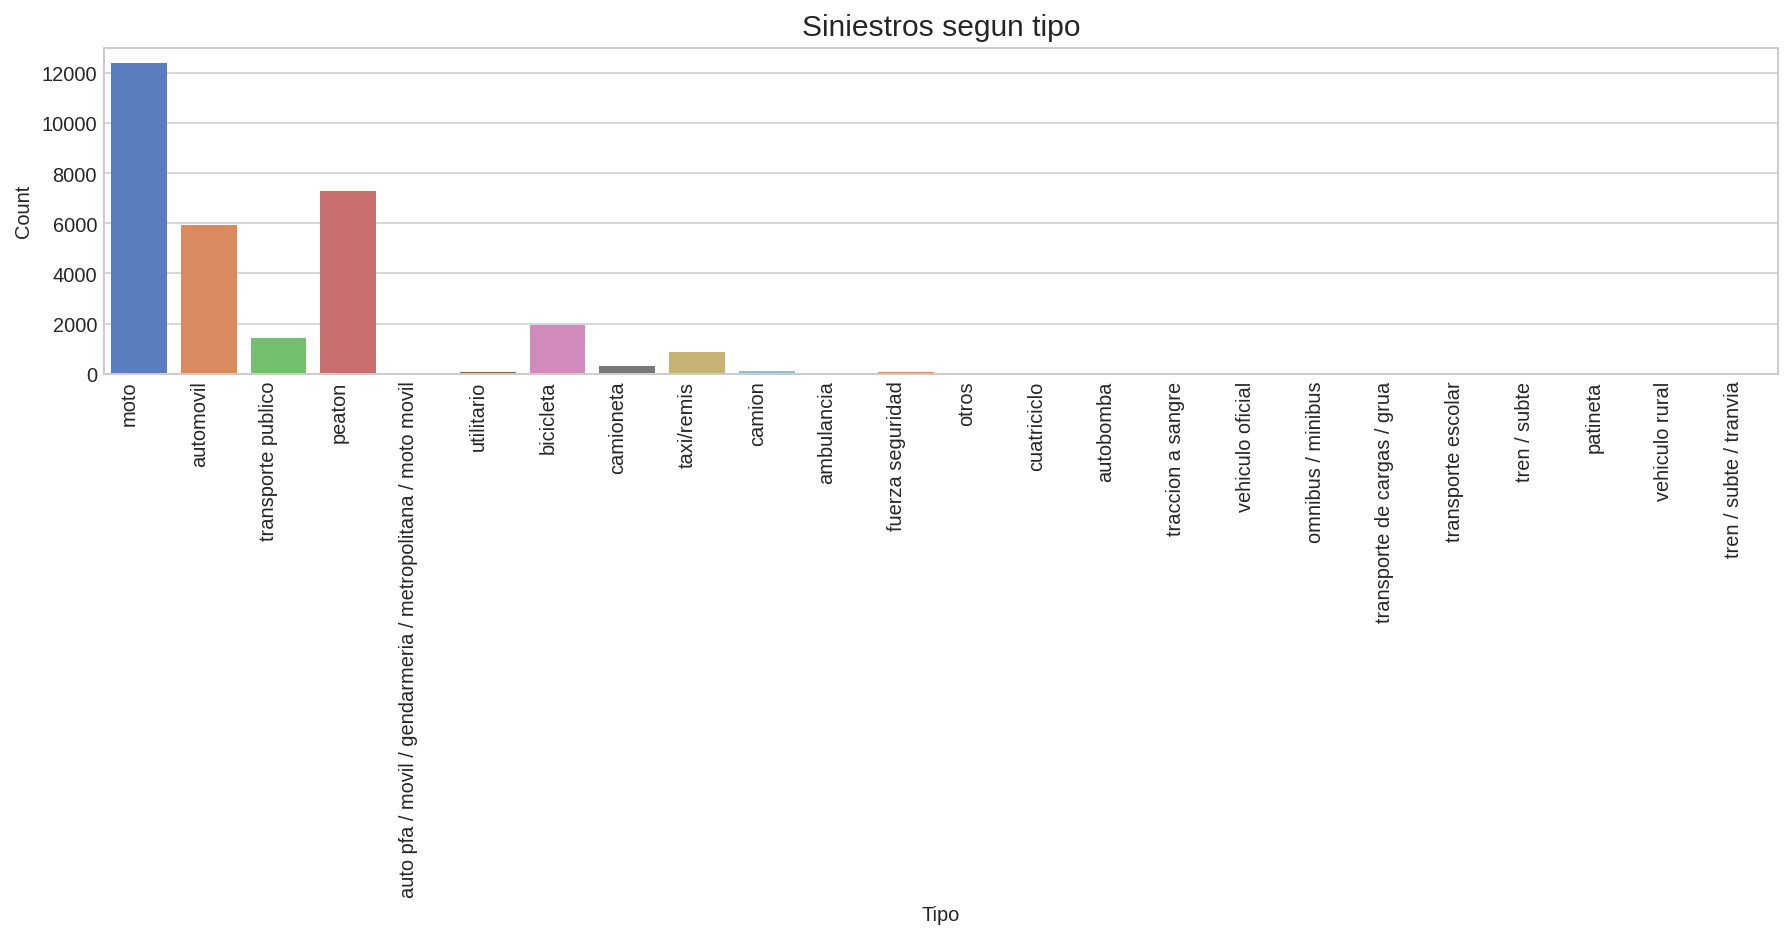

In [16]:
# Grafiacmos la cantidad de siniestros por tipo

plt.figure(figsize=(15,3))
g = sns.countplot(x='tipo',data=df_sin, palette = "muted",)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('Siniestros segun tipo',size = 15)
plt.xlabel("Tipo")
plt.ylabel("Count")
plt.show()

In [6]:
# Generamos un nuevo DF solo con los tipos de siniestros más recurrentes (top 5)

top5_tipo = ['moto', 'peaton', 'automovil', 'bicicleta', 'transporte publico']
df_sin_top = df_sin[df_sin["tipo"].isin(top5_tipo)]

In [7]:
print(f'Shape: {np.shape(df_sin_top)}')
df_sin_top.head(3)

Shape: (29012, 8)


,tipo,sexo,causa,x,y,cantidad_victimas,comuna,edad
6,moto,masculino,homicidio,-58.377362,-34.617451,1,1.0,18.0
7,automovil,masculino,lesiones,-58.469471,-34.629286,1,7.0,26.0
8,moto,masculino,homicidio,-58.528416,-34.650157,1,9.0,24.0


In [8]:
# Verificamos la cantidad de siniestros por tipo para nuestro nuevo DF

df_sin_top.tipo.value_counts() 

moto                  12395
peaton                 7301
automovil              5930
bicicleta              1963
transporte publico     1423
Name: tipo, dtype: int64

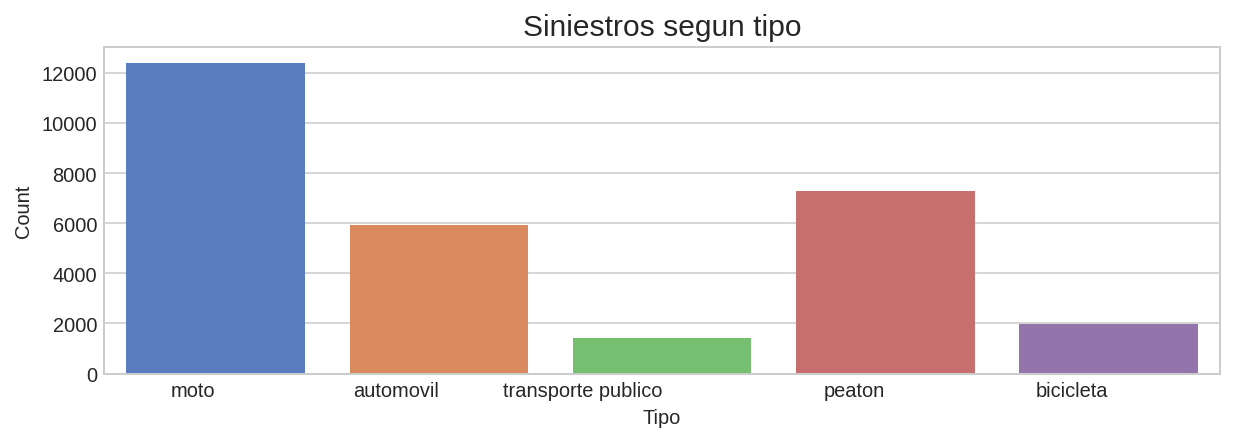

In [46]:
# Graficamos la cantidad de siniestros por tipo para nuestro nuevo DF

plt.figure(figsize=(10,3))
g = sns.countplot(x='tipo',data=df_sin_top, palette = "muted",)
g.set_xticklabels(g.get_xticklabels(), rotation=0, ha="right")
plt.title('Siniestros segun tipo',size =15)
plt.xlabel("Tipo")
plt.ylabel("Count")
plt.show()

In [9]:
# Siniestros segun SEXO

df_sin_top.sexo.value_counts()

masculino    19760
femenino      9252
Name: sexo, dtype: int64

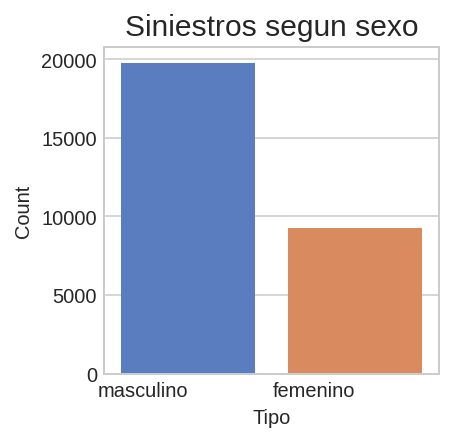

In [51]:
plt.figure(figsize=(3,3))
g = sns.countplot(x='sexo',data=df_sin_top, palette = "muted",)
g.set_xticklabels(g.get_xticklabels(), rotation=0, ha="right")
plt.title('Siniestros segun sexo',size =15)
plt.xlabel("Tipo")
plt.ylabel("Count")
plt.show()

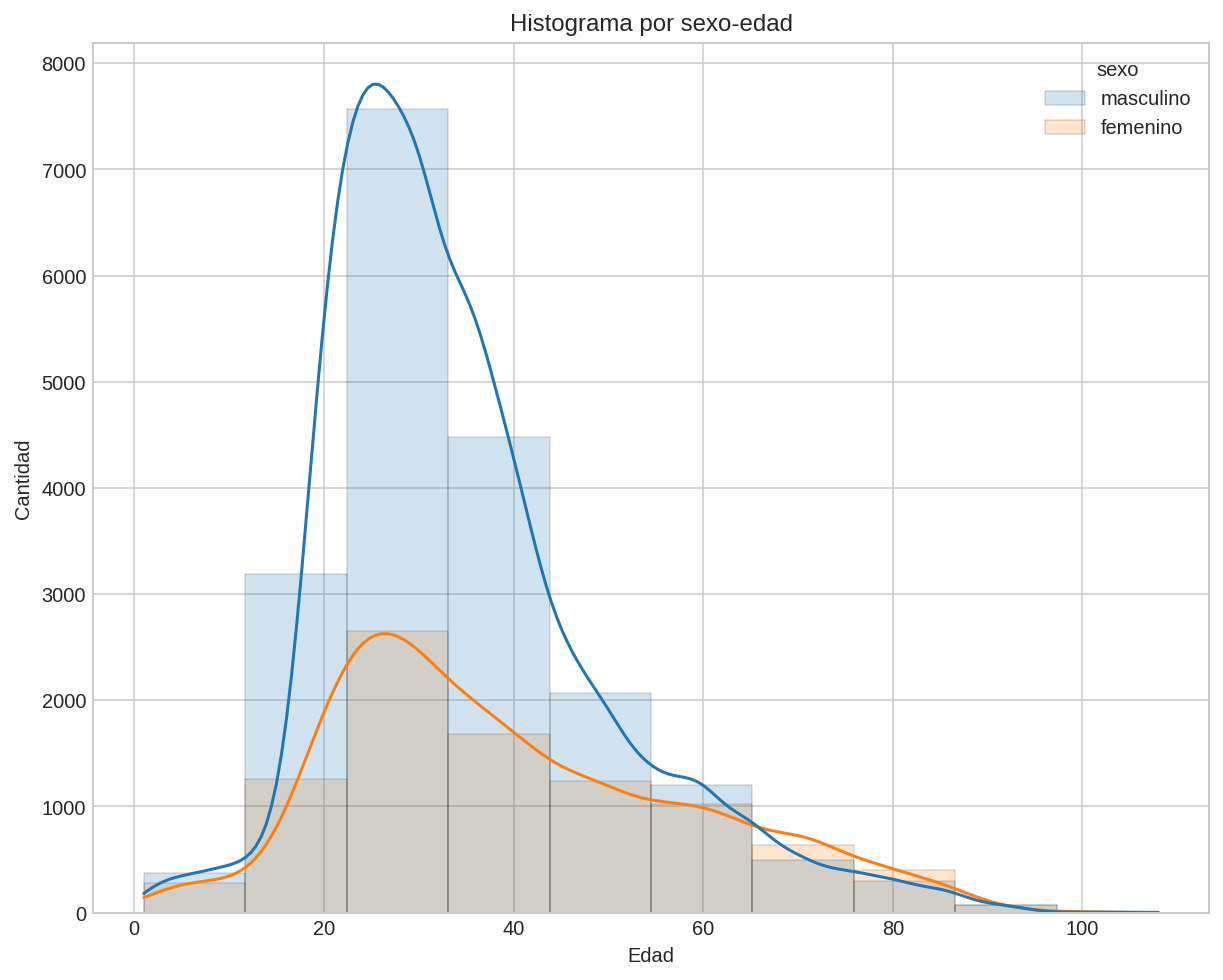

In [57]:
# Histograma por edad (cantidad de siniestros por edad y tipo)

fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
age=sns.histplot(df_sin_top, x="edad", bins = 10,hue='sexo', kde="True", alpha=0.2, linewidth=0.1)
plt.xlabel("Edad")
plt.ylabel("Cantidad")
plt.title("Histograma por sexo-edad")
plt.show(age)

In [21]:
# Verificamos la cantidad de siniestros por comuna para nuestro nuevo DF

df_sin_top.comuna.value_counts()

1.0     4015
3.0     2673
15.0    2278
9.0     2149
14.0    2147
4.0     2084
11.0    1882
7.0     1838
13.0    1701
12.0    1636
10.0    1573
5.0     1489
8.0     1281
6.0     1134
2.0     1132
Name: comuna, dtype: int64

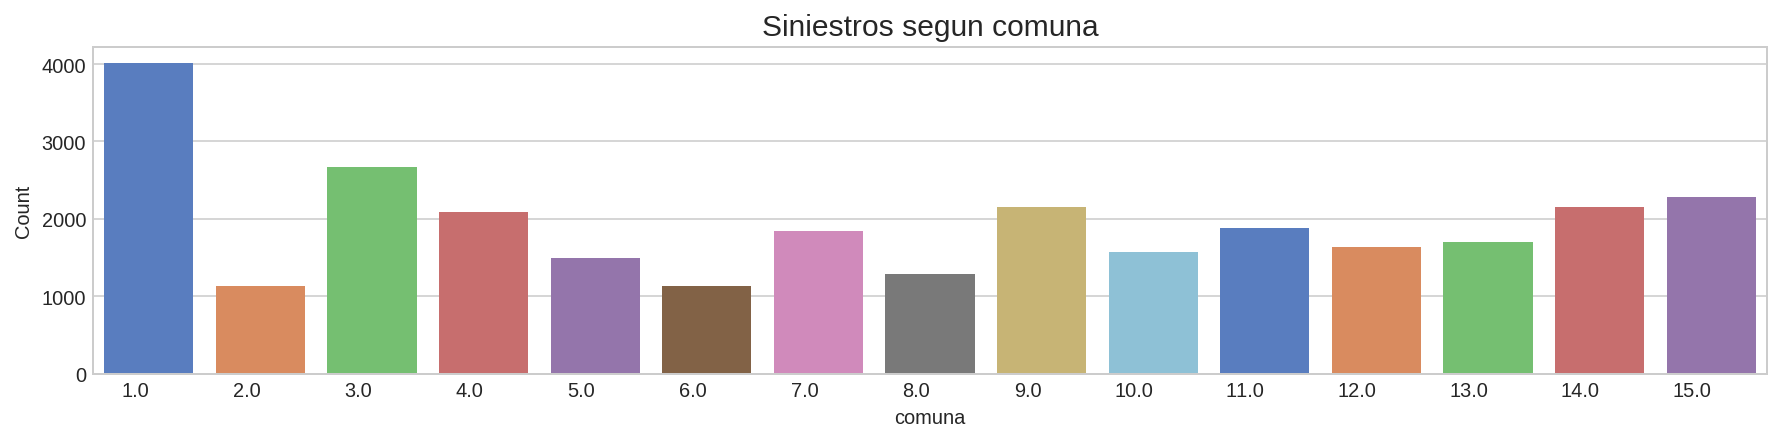

In [23]:
# Grafiacmos la cantidad de siniestros por comuna

plt.figure(figsize=(15,3))
g = sns.countplot(x='comuna',data=df_sin_top, palette = "muted",)
g.set_xticklabels(g.get_xticklabels(), rotation=0, ha="right")
plt.title('Siniestros segun comuna',size = 15)
plt.xlabel("comuna")
plt.ylabel("Count")
plt.show()

In [31]:
# Generamos un DF con las comunas con mas siniestros (top 5 - solo para poder observarlas el mapa)

top5_comuna = [1, 3, 15, 9, 14]
df_sin_top_comuna = df_sin_top[df_sin_top["comuna"].isin(top5_comuna)]

In [32]:
df_sin_top_comuna.comuna.value_counts()

1.0     4015
3.0     2673
15.0    2278
9.0     2149
14.0    2147
Name: comuna, dtype: int64

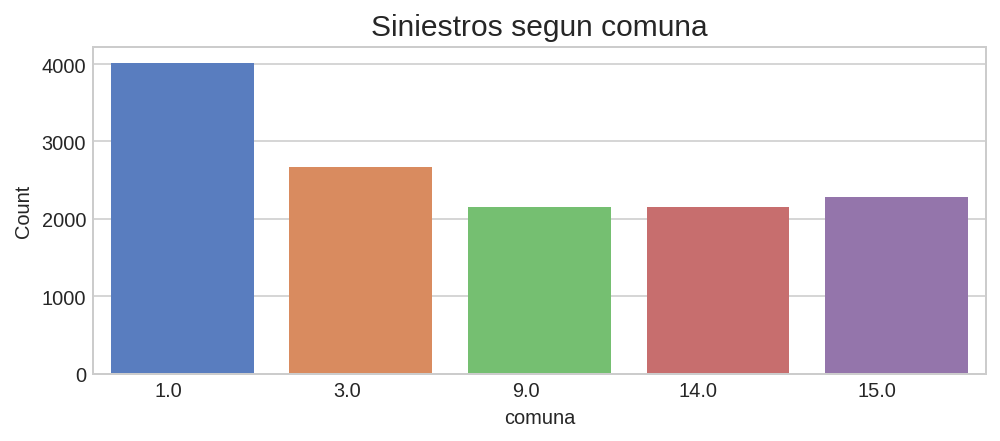

In [59]:
# Grafiacmos la cantidad de siniestros por comuna para el top 5

plt.figure(figsize=(8,3))
g = sns.countplot(x='comuna',data=df_sin_top_comuna, palette = "muted",)
g.set_xticklabels(g.get_xticklabels(), rotation=0, ha="right")
plt.title('Siniestros segun comuna',size = 15)
plt.xlabel("comuna")
plt.ylabel("Count")
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


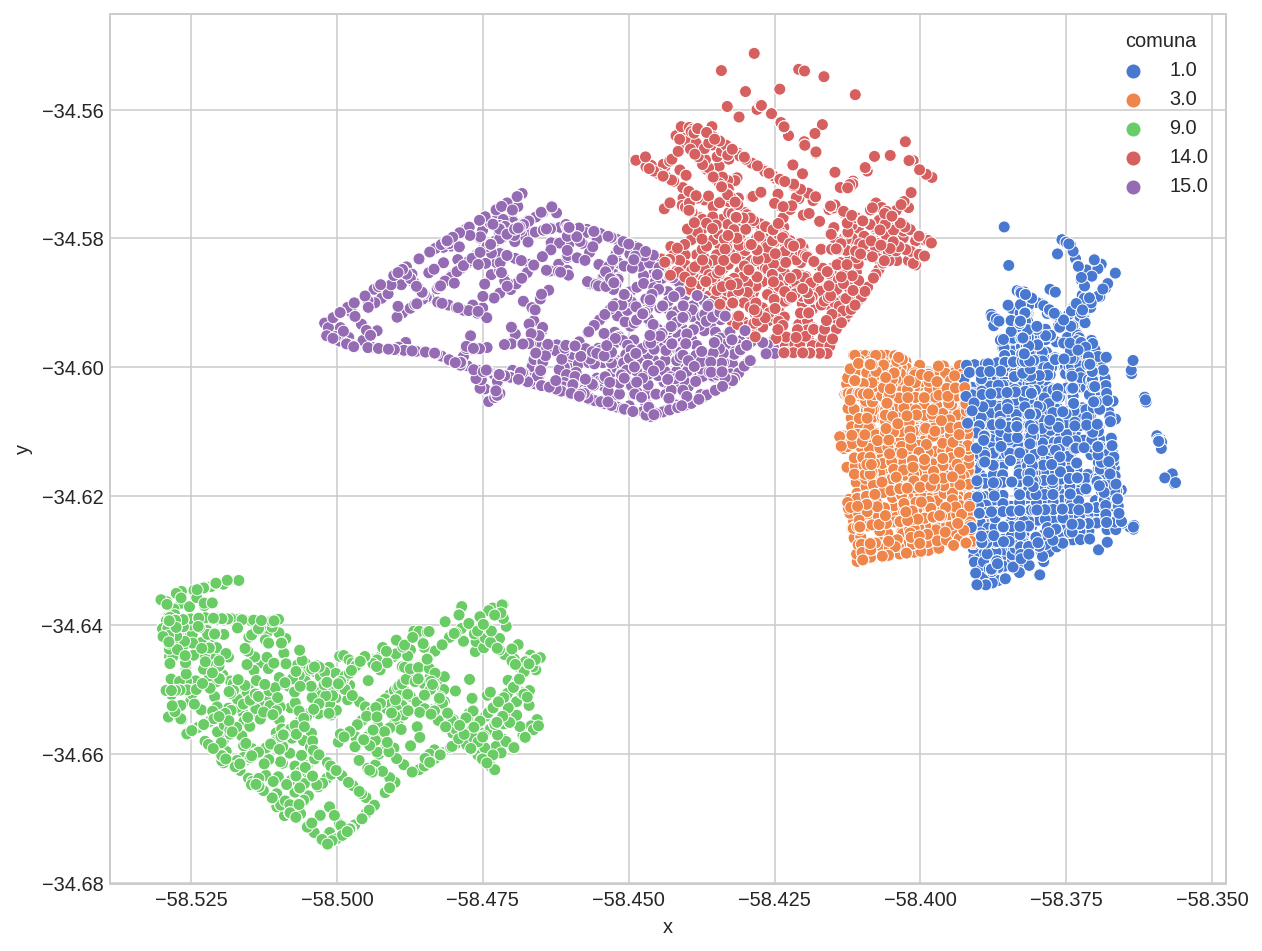

In [35]:
# Las 5 comunas con mas siniestros

plt.figure(figsize=(10,8)) # ubicacion geografica de nustro top 5
sns.scatterplot(df_sin_top_comuna['x'],df_sin_top_comuna['y'],hue=df_sin_top_comuna['comuna'],palette='muted')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


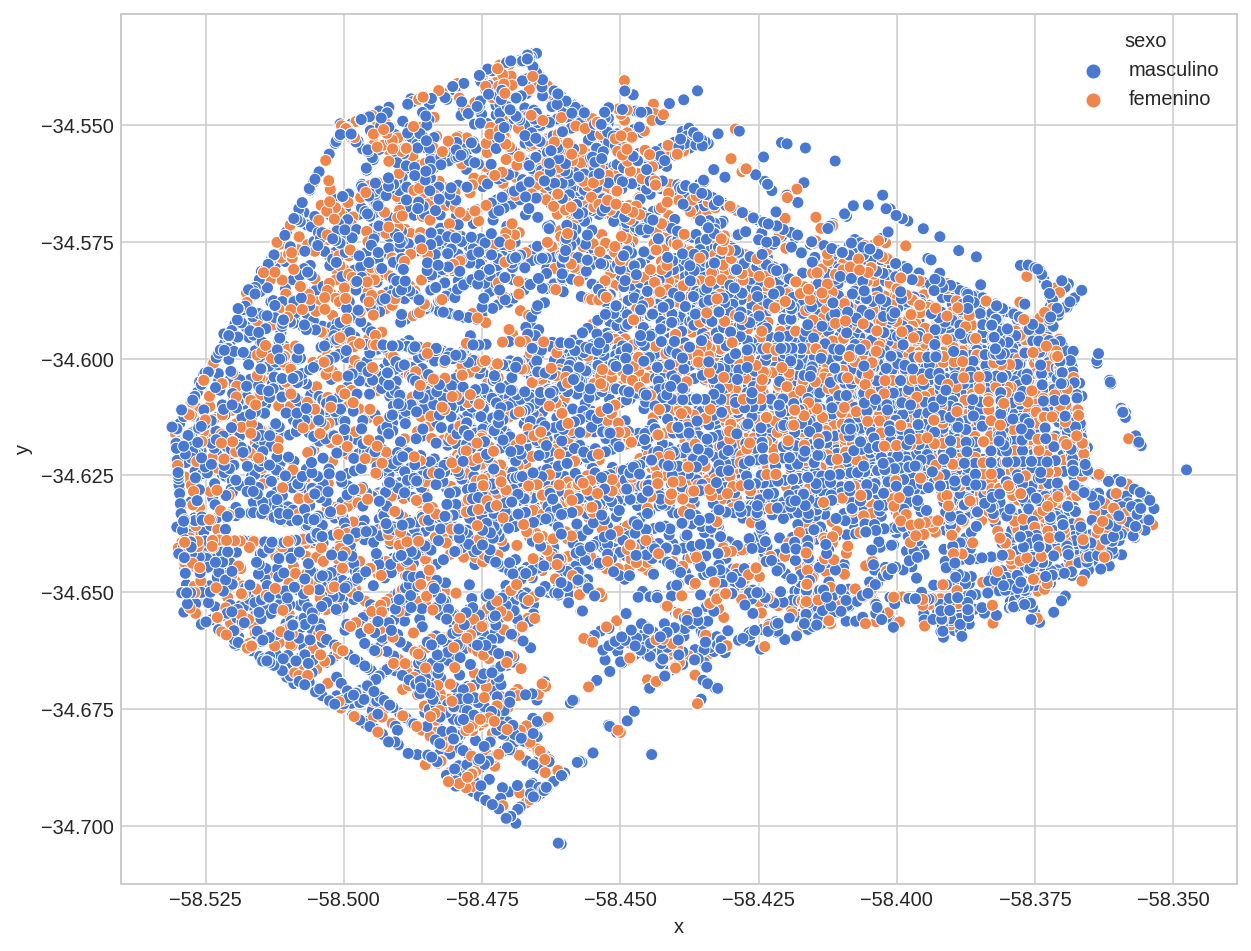

In [36]:
# Distribucion de los siniestros en el mapa segun SEXO

plt.figure(figsize=(10,8)) # ubicacion geografica de nustro top 5
sns.scatterplot(df_sin_top['x'],df_sin_top['y'],hue=df_sin_top['sexo'],palette='muted')
plt.show()

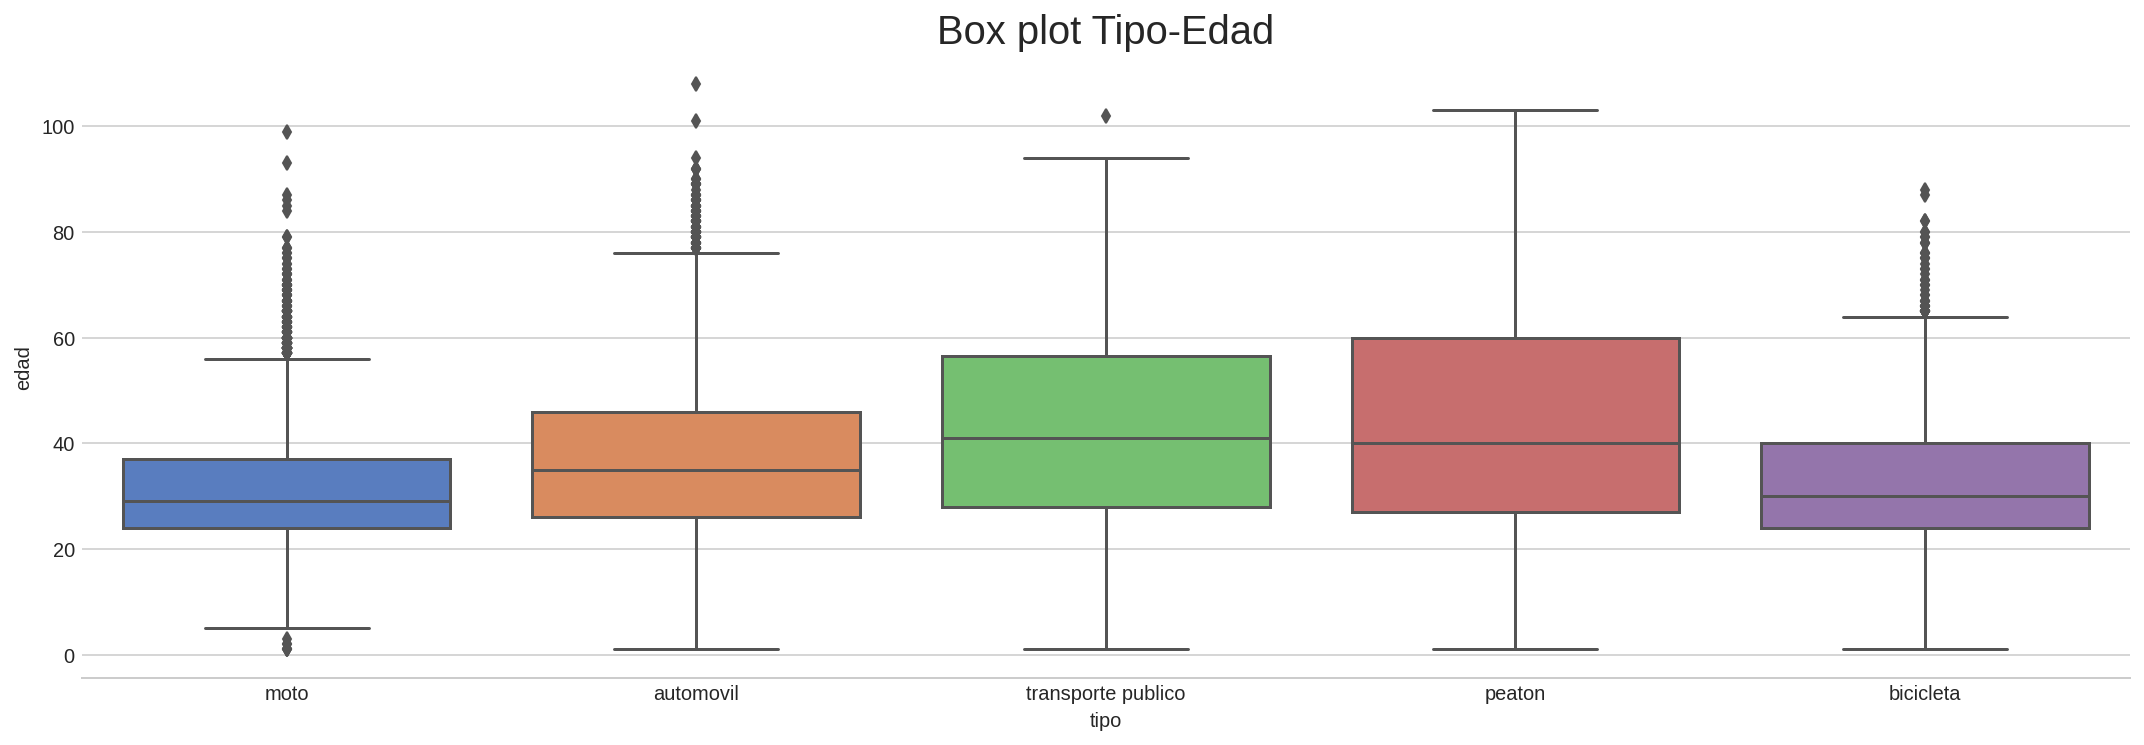

In [64]:
# Grafico de cajas para obsertcar la edad de las victiamas y su promedio por tipo

g = sns.catplot(x="tipo",y='edad',data=df_sin_top, kind="box", height = 5,aspect=3 ,palette = "muted")
g.despine(left=True)
g.set_xticklabels(rotation=0)
g = g.set_ylabels("edad")
plt.title('Box plot Tipo-Edad',size = 20)
plt.show()

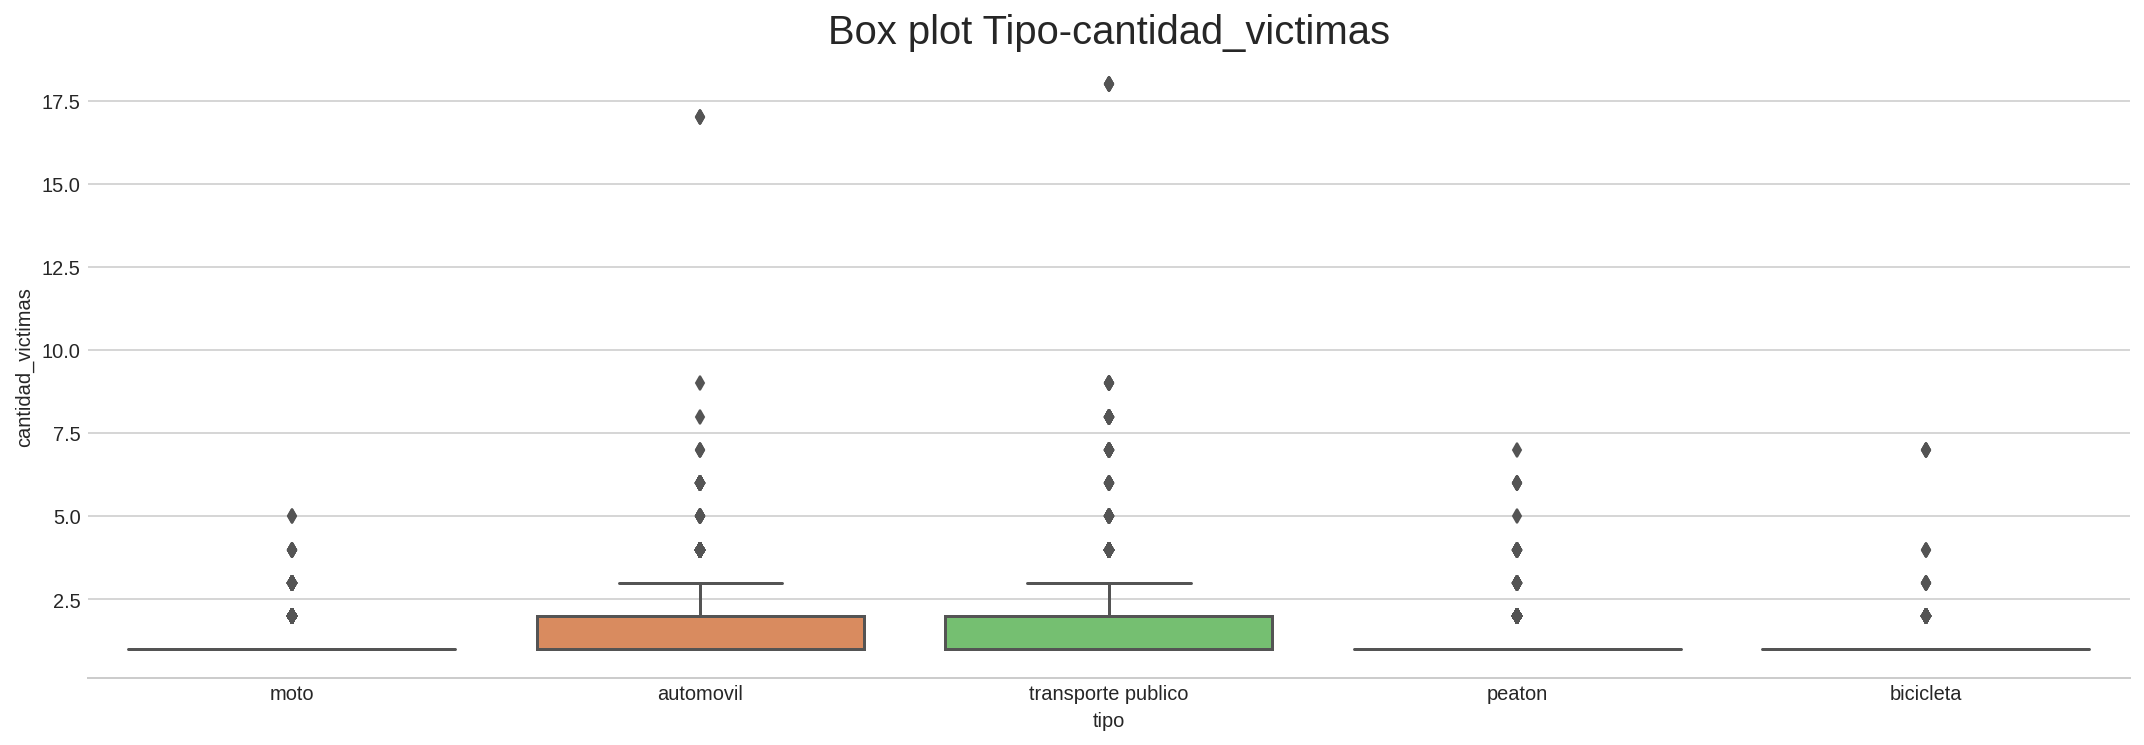

In [26]:
# Grafico de cajas para obsertcar la cantidad de victiamas y su promedio por tipo

g = sns.catplot(x="tipo",y='cantidad_victimas',data=df_sin_top, kind="box", height = 5,aspect=3 ,palette = "muted")  # como hacer para los outliers
g.despine(left=True)
g.set_xticklabels(rotation=0)
g = g.set_ylabels('cantidad_victimas')
plt.title('Box plot Tipo-cantidad_victimas',size = 20)
plt.show()

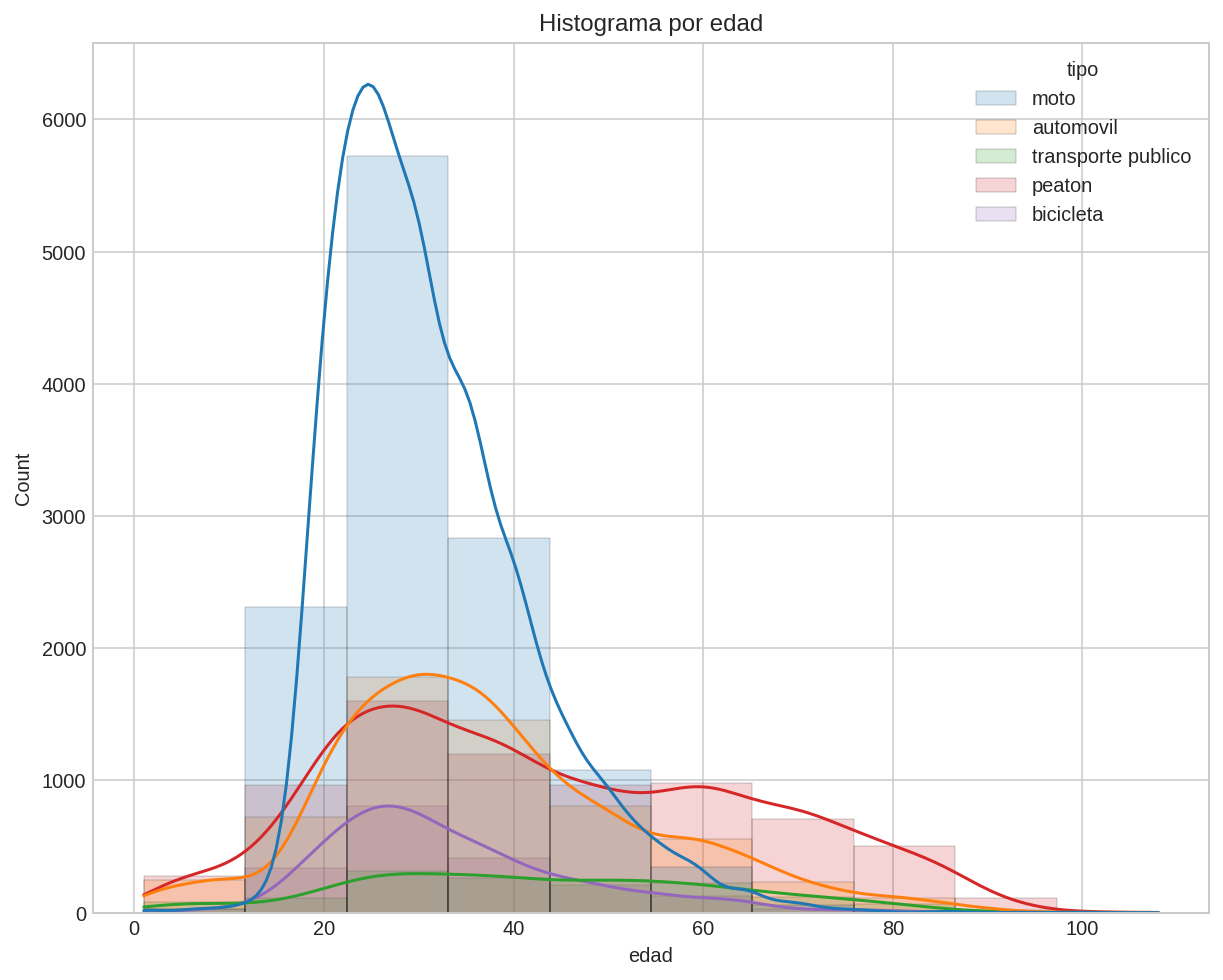

In [27]:
# Histograma por edad (cantidad de siniestros por edad y tipo)

fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
age=sns.histplot(df_sin_top, x="edad", bins = 10,hue='tipo', kde="True", alpha=0.2, linewidth=0.1)
plt.xlabel("edad")
plt.ylabel("Count")
plt.title("Histograma por edad")
plt.show(age)

In [28]:
# Media de la edad

tipo_top_stats = df_sin_top.groupby('tipo').agg({'edad':['mean'], 'cantidad_victimas':['sum','max','min']})
tipo_top_stats

edad cantidad_victimas        
                         mean               sum max min
tipo                                                   
automovil           37.176728              8324  17   1
bicicleta           33.353540              2084   7   1
moto                31.335458             13475   5   1
peaton              43.286399              7773   7   1
transporte publico  42.572031              2810  18   1

                          x         y  cantidad_victimas    comuna      edad
x                  1.000000  0.050951           0.030308 -0.667359  0.016875
y                  0.050951  1.000000           0.001687  0.374122  0.054327
cantidad_victimas  0.030308  0.001687           1.000000  0.000749 -0.033594
comuna            -0.667359  0.374122           0.000749  1.000000 -0.002207
edad               0.016875  0.054327          -0.033594 -0.002207  1.000000


<AxesSubplot:>

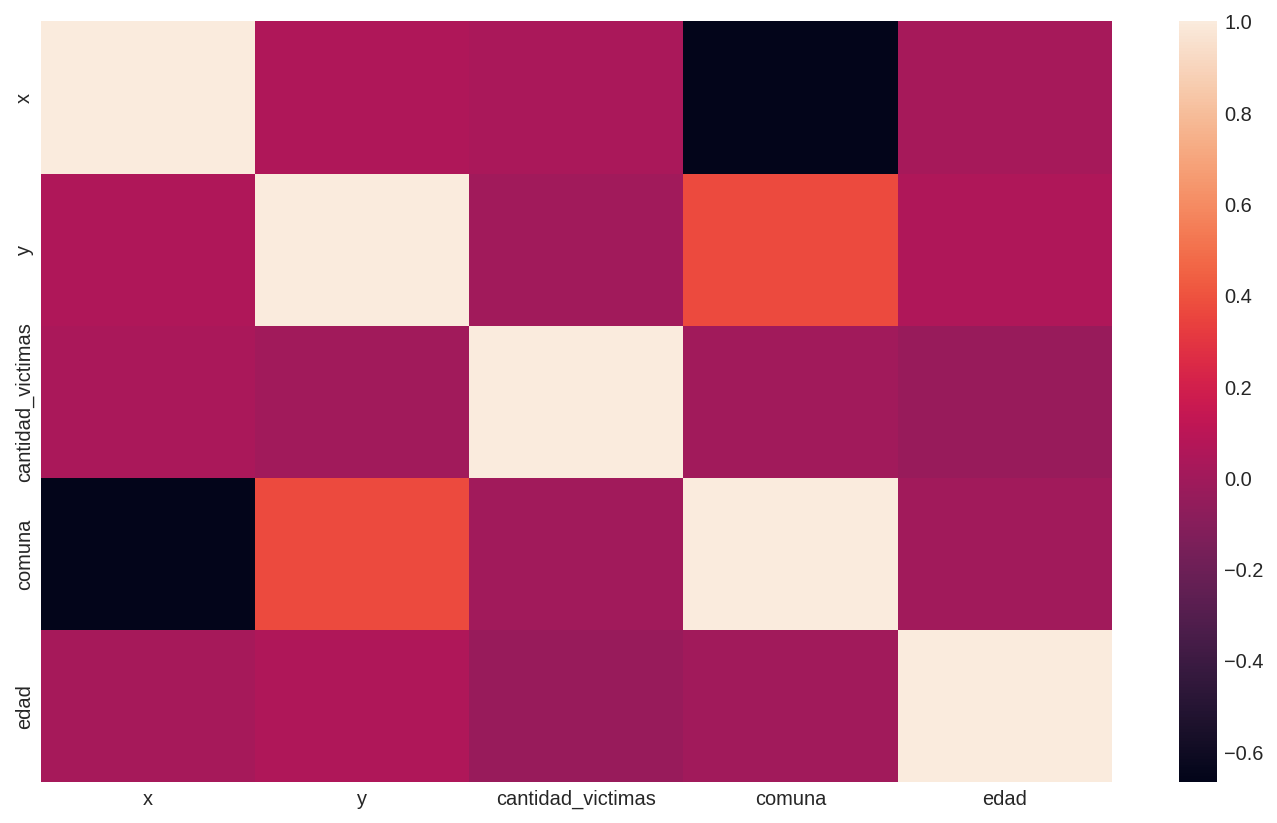

In [29]:
corr = df_sin_top.corr()
print(corr)
sns.heatmap(corr)